In [506]:
#importing necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.graphics.regressionplots import plot_partregress_grid
from statsmodels.formula.api import ols

In [507]:
# reading data

df = pd.read_csv('E:/DKIT/python/CA4/Data Science Salary 2021 to 2023.csv')

In [508]:
df.head()

work_year experience_level employment_type                job_title  \
0       2023               EN              FT        Applied Scientist   
1       2023               EN              FT        Applied Scientist   
2       2023               EN              FT     Data Quality Analyst   
3       2023               EN              FT  Compliance Data Analyst   
4       2023               EN              FT        Applied Scientist   

   salary salary_currency  salary_in_usd company_location company_size  
0  213660             USD         213660               US            L  
1  130760             USD         130760               US            L  
2  100000             USD         100000               NG            L  
3   30000             USD          30000               NG            L  
4  204620             USD         204620               US            L

In [403]:
# Work year: Indicates the particular year that the wage information was gathered.
# Experience level: The employees’ degree of job experience, divided into
#four categories: entry-level (EN), mid-level (MI), experienced (EX), and senior (SE).
# kind of job: The designations FT (Full-Time), CT (Contractor), FL (Free-lancer),
#and PT (Part-Time) indicate the kind of employment.
# Job title: The titles held by the staff members, such as ”Data Quality Analyst,” ”Applied Scientist,” etc.
# Salary: The pay amounts expressed in the appropriate currency formats.
# Salary currency: The code in currency that denotes the salary.
# Salary in USD: The converted USD salary data for consistent comparison.
# Company location: Using country codes (such as ”US” for the United States and ”NG” for Nigeria), 
#the locations of the firms are indicated.
# Company size: The firms’ sizes are categorized as ”Large,” ”Medium,” and ”Small.”

In [509]:
df.shape # dimension of dataframe

(3761, 9)

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [511]:
#work_year is ordinal categorical variable
#experience_level ordinal categorical variable
#employment_type nominal categorical cariable
#job_title ordinal categorical cariable
#salary is continious numerical variable
#salary_currency nominal categorical variable
#salary_in_usd continious numerical variable
#company_location nomical categorical variable
#company_size ordinal categorical variable

In [512]:
df.describe()

work_year        salary  salary_in_usd
count  3761.000000  3.761000e+03    3761.000000
mean   2022.374103  1.905999e+05  137555.178942
std       0.691252  6.711457e+05   63022.267974
min    2020.000000  6.000000e+03    5132.000000
25%    2022.000000  1.000000e+05   95000.000000
50%    2022.000000  1.375000e+05  135000.000000
75%    2023.000000  1.800000e+05  175000.000000
max    2023.000000  3.040000e+07  450000.000000

# Missing value

In [513]:
df.isnull().sum() # observing null values

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

# Data Cleaning

In [514]:
#  Replace values in experience-level column
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

In [515]:
# Replace values in employment_type column
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [516]:
# Replace values in Company size column
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

In [517]:
df.head(5)

work_year experience_level employment_type                job_title  \
0       2023      Entry-Level       Full-Time        Applied Scientist   
1       2023      Entry-Level       Full-Time        Applied Scientist   
2       2023      Entry-Level       Full-Time     Data Quality Analyst   
3       2023      Entry-Level       Full-Time  Compliance Data Analyst   
4       2023      Entry-Level       Full-Time        Applied Scientist   

   salary salary_currency  salary_in_usd company_location company_size  
0  213660             USD         213660               US        Large  
1  130760             USD         130760               US        Large  
2  100000             USD         100000               NG        Large  
3   30000             USD          30000               NG        Large  
4  204620             USD         204620               US        Large

# EDA

# univarient analysis

<Axes: xlabel='salary_in_usd', ylabel='Count'>

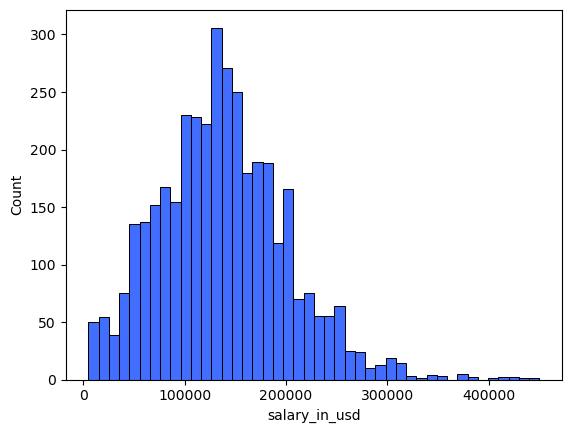

In [518]:
sns.histplot(data=df, x = 'salary_in_usd')
# most of the data science job has median salary of about 140000 in USD

## Outlier detection 

<Axes: ylabel='salary_in_usd'>

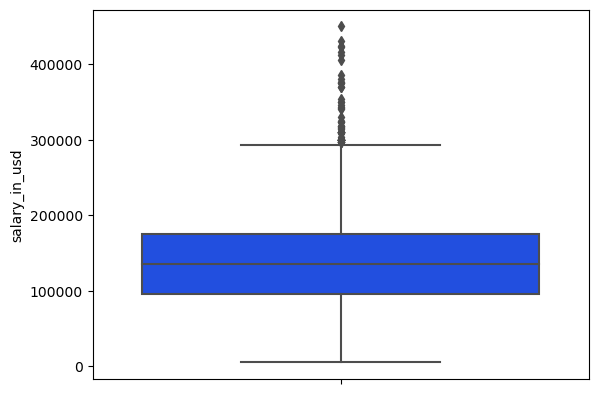

In [519]:
sns.boxplot(data=df, y=df['salary_in_usd'])

<Axes: xlabel='experience_level', ylabel='count'>

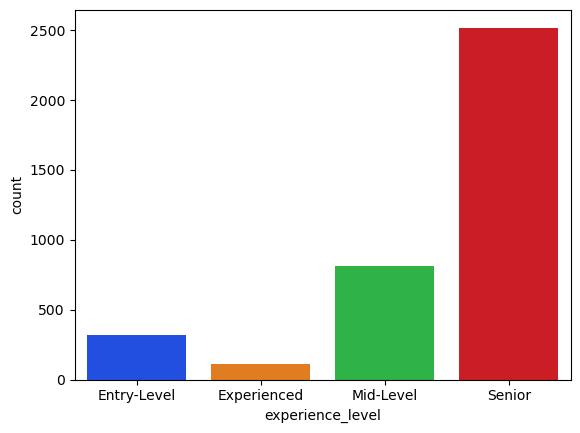

In [520]:
sns.countplot(data=df, x=df['experience_level'])
# Most of data has senior in it followed by mid level, entry level and experienced respectively

<Axes: xlabel='employment_type', ylabel='count'>

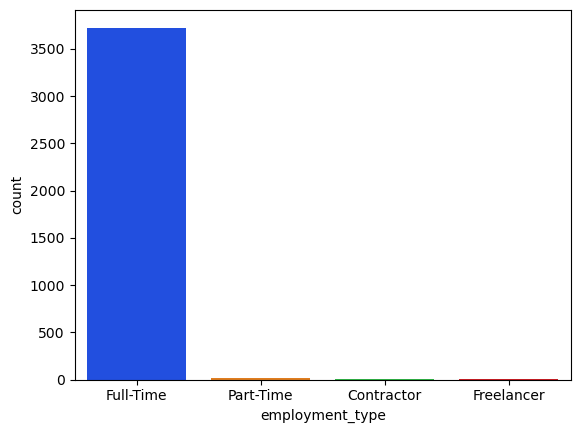

In [521]:
sns.countplot(data=df, x=df['employment_type'])

# Full time is the most employment type in our data

<Axes: xlabel='company_size', ylabel='count'>

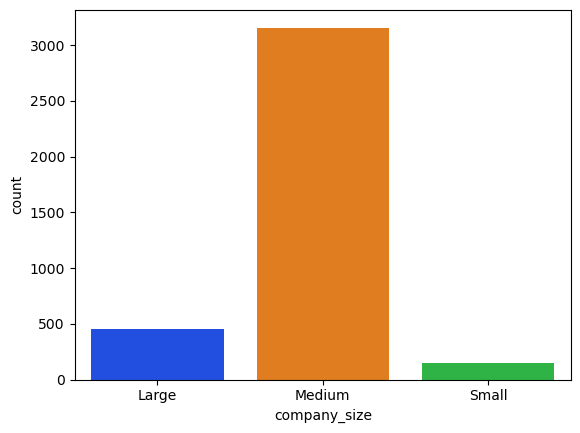

In [522]:
sns.countplot(data=df, x=df['company_size'])
## Medium is the most company size in data followed by large and small

# Bivarient analysis

<Axes: xlabel='company_size', ylabel='count'>

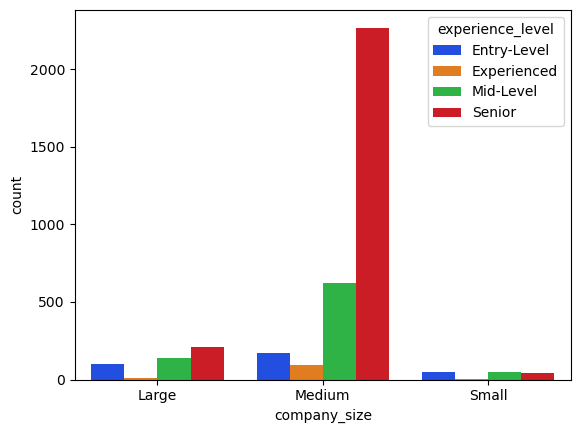

In [523]:
sns.countplot(data=df, x=df['company_size'], hue=df['experience_level'])
# medium size company has most senior level experience

<Axes: xlabel='company_size', ylabel='count'>

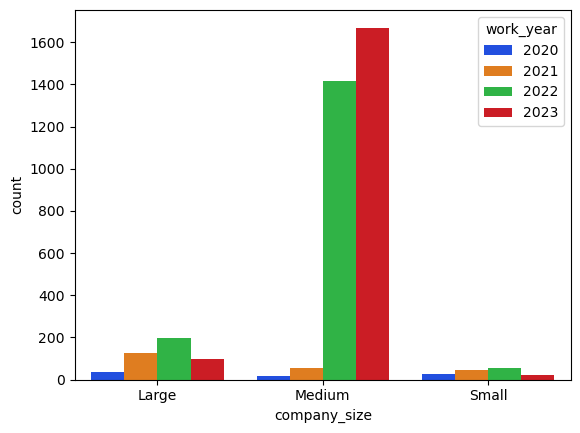

In [524]:
sns.countplot(data=df, x=df['company_size'], hue=df['work_year'])
# medium sized company has most of the work year data of 2023,2022

<Axes: xlabel='company_size', ylabel='count'>

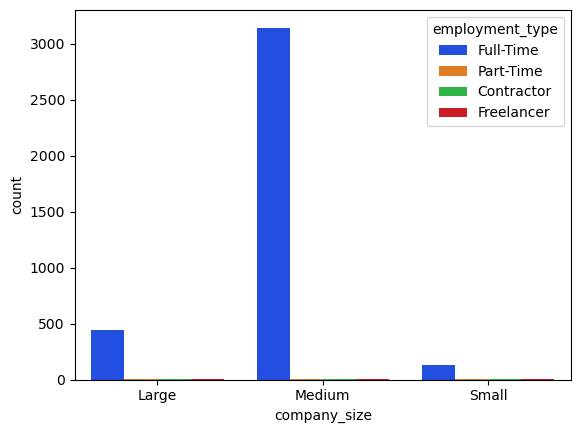

In [525]:
sns.countplot(data=df, x=df['company_size'], hue=df['employment_type'])
## As most of the data is of full time employment in medium size company followed by large and small

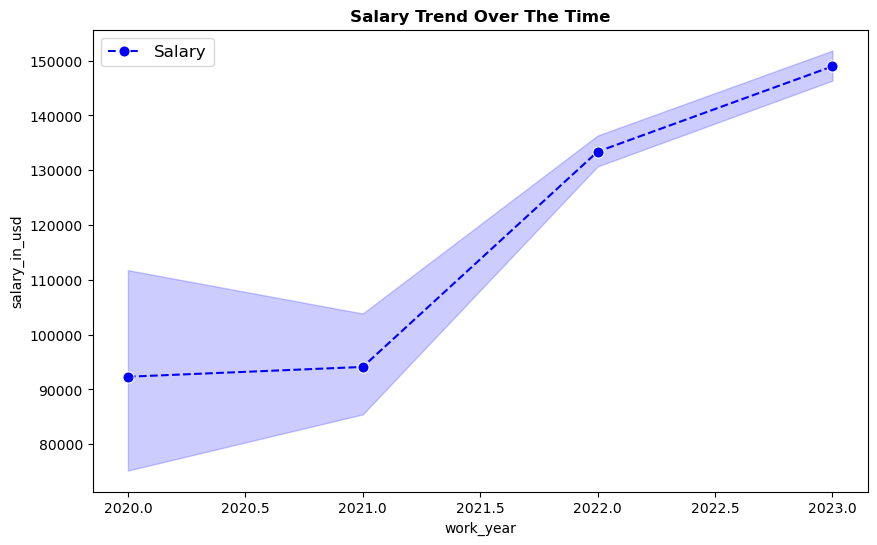

In [526]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')
plt.legend(['Salary'], loc='upper left', fontsize=12)

plt.show()

# salary trend

#salary between 2020-2021 ==> slight/no change in salary
#salary between 2021-2022 ==> increases 
#salary between 2022-2023 ==> increases

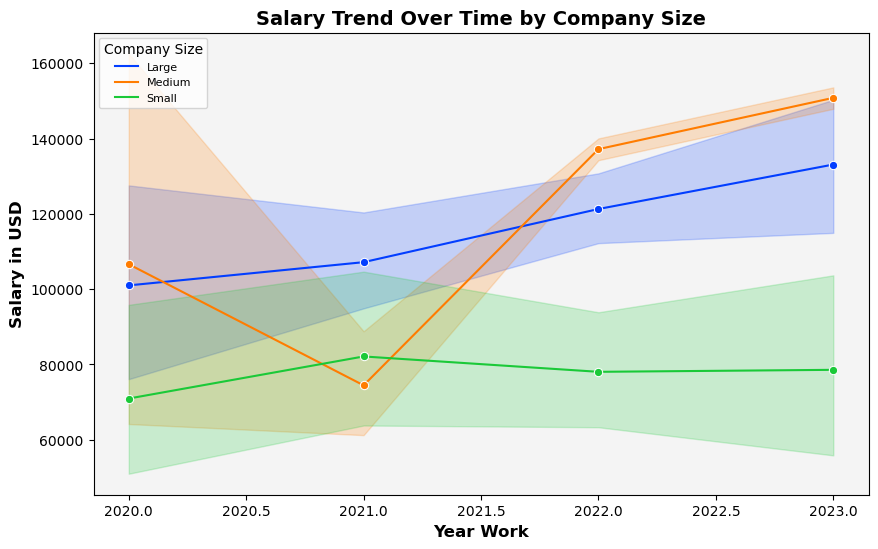

In [527]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(title='Company Size', title_fontsize=10, fontsize=8, loc='upper left')

# Add a title
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')


# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()


# for small size company salary hasn't change much over time
# for medium size company, it decreased between 2020 to 2021 then increased drastically
# for large size company, salary increased linearly over time

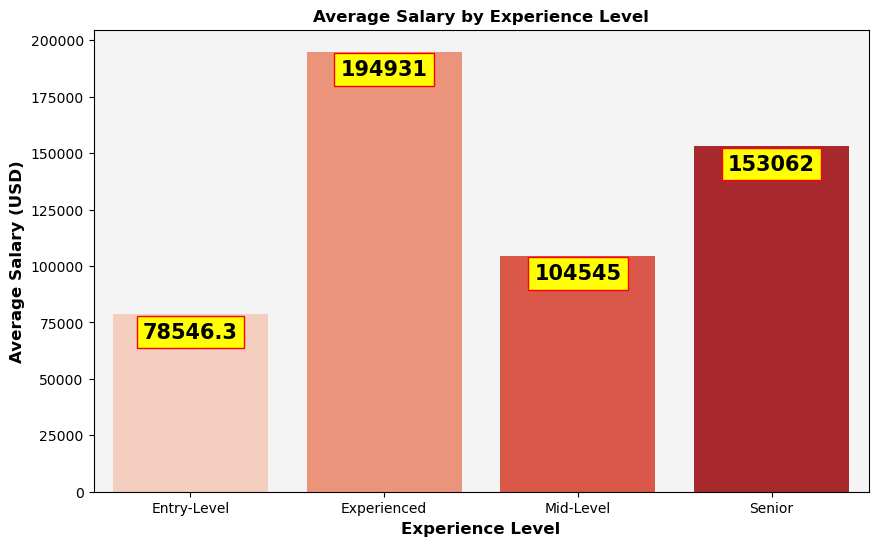

In [528]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Reds')
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -20,
                fontsize = 15,
                bbox = {'boxstyle': 'square', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

plt.show()

##Average salary for entry level is lowest followed by mid level then senior leveland experienced has the highest average salary

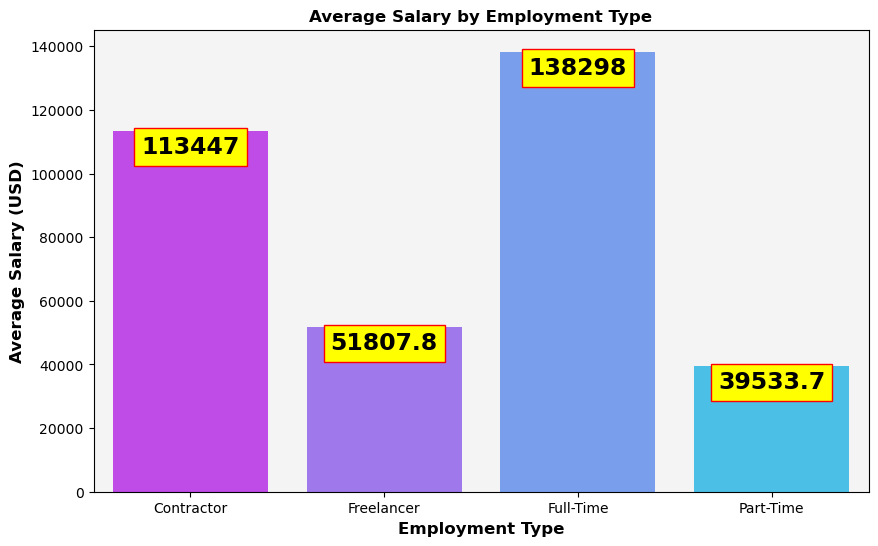

In [529]:
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'cool_r')
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                padding = -20,
                fontsize = 17,
                bbox = {'boxstyle': 'square', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold'
                 )

# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)

plt.show()

# Full type job will have the highest salary followed by contractor, freelancer and part time

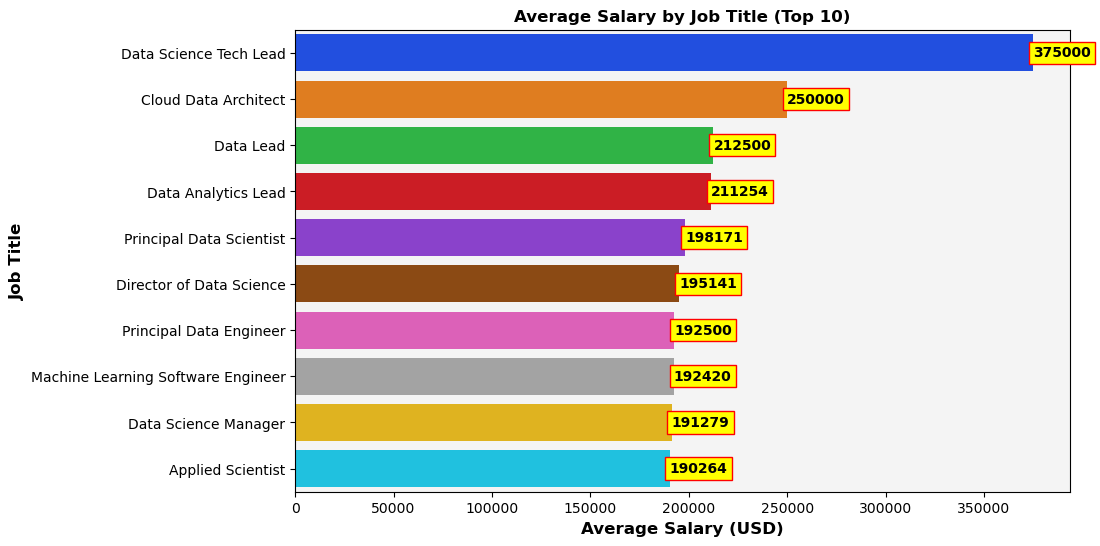

In [530]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                
                bbox = {'boxstyle': 'square', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold'
                
               
               )
# Customize the background color
p.set_facecolor("#f4f4f4")

# Remove the grid lines
p.grid(False)
plt.show()

# Top 3 average salary by title are

#Data Science Tech Lead
#Cloud Data Architect
#Data Lead

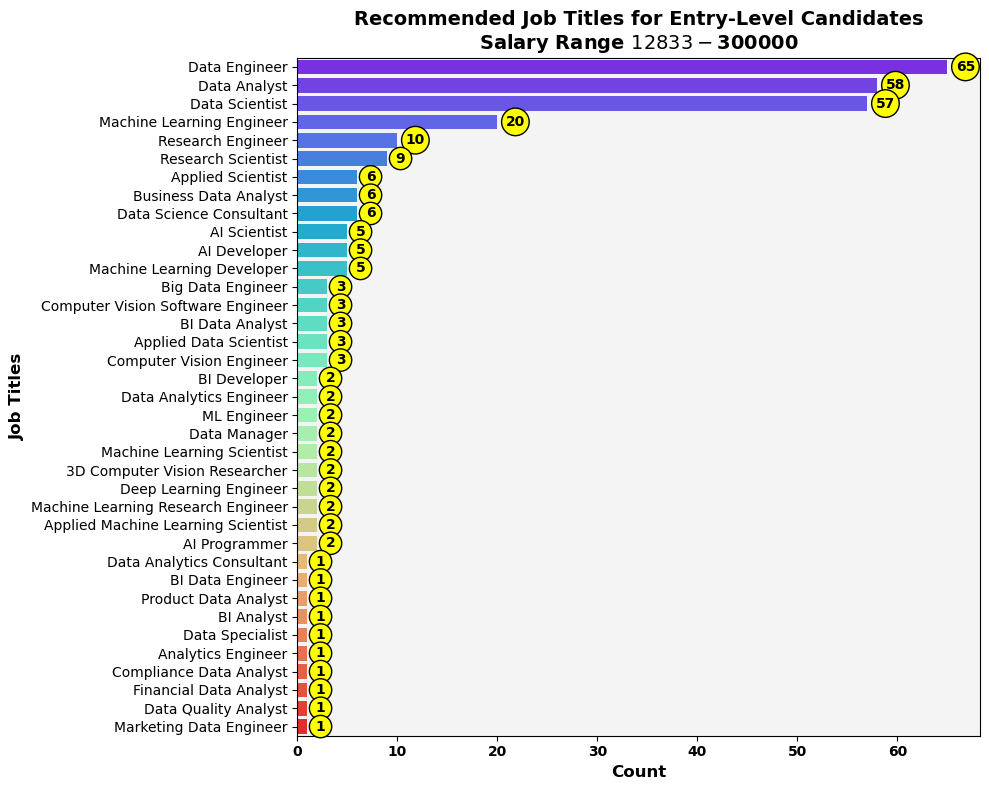

In [531]:
# Define candidate criteria
desired_experience_level = 'Entry-Level'
desired_salary_range = (12833, 300000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))

ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,
                 bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

# Customize the background color
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()

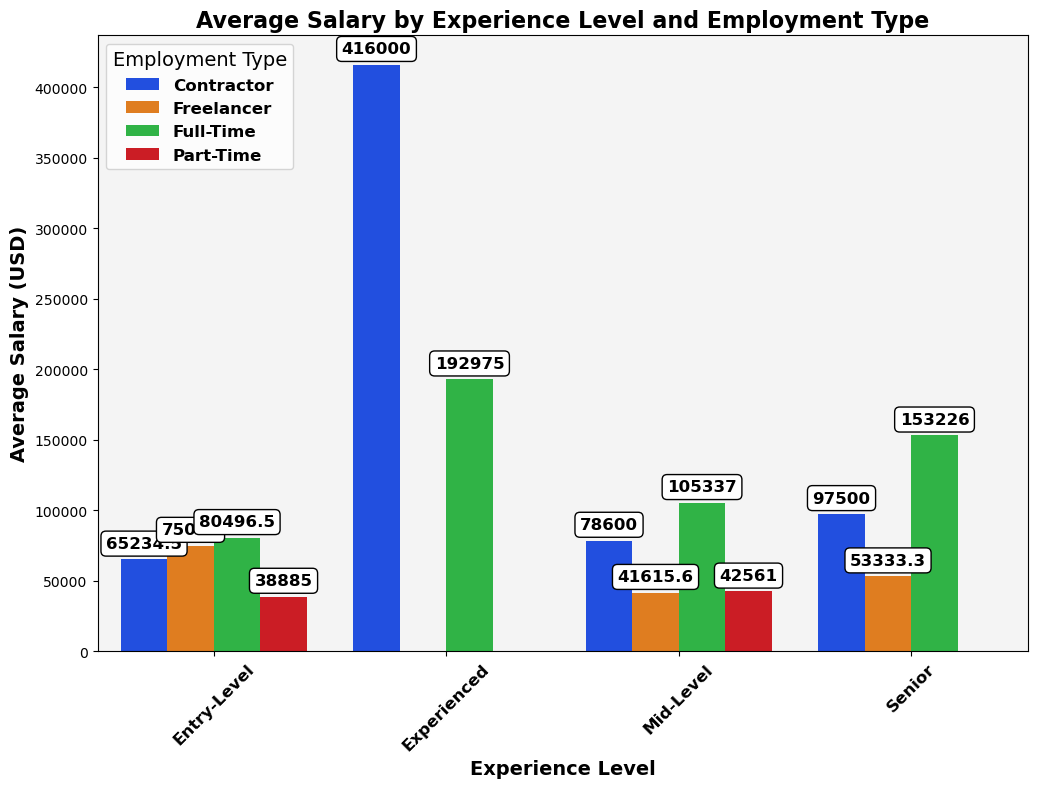

In [532]:
# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')


plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set the background color to a light gray
ax.set_facecolor("#f4f4f4")

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()

#Best Employment Type and Experience Level for Maximum Cost-Effectiveness:

#Experience Level: Experienced
#Employment Type: Contractor
#Average Salary (USD): 416,000.0

In [428]:
#Best Employment Type and Experience Level for Maximum Cost-Effectiveness:

#Experience Level: Experienced
#Employment Type: Contractor
#Average Salary (USD): 416,000.0

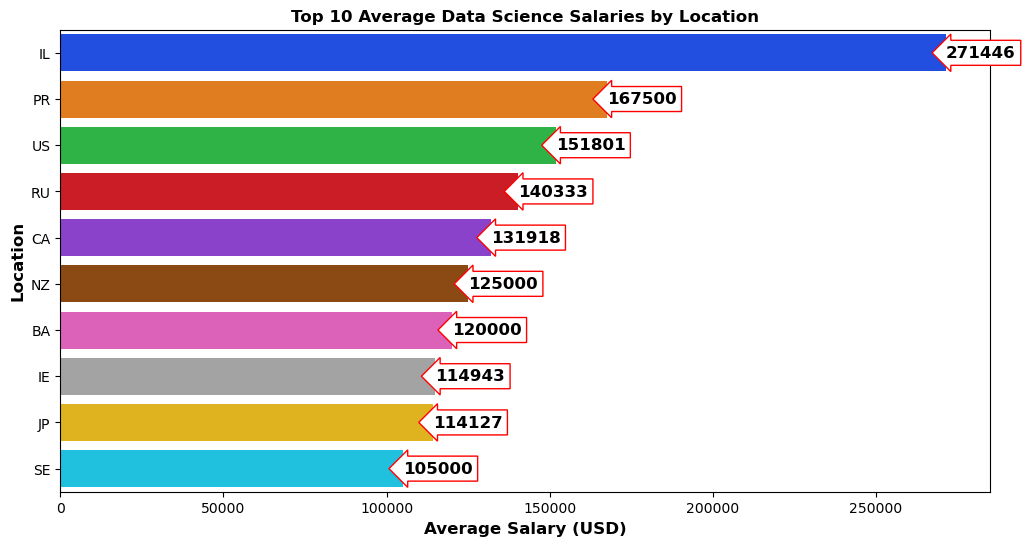

In [533]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
ax.set_facecolor("#f4f4f4")
plt.show()

In [534]:
# importing bokeh 
from bokeh.io import show, output_notebook, curdoc
from bokeh.plotting import figure,output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE 

from bokeh.plotting import figure, output_file, show, output_notebook
import bokeh.io

In [535]:
output_notebook(resources=INLINE)

Loading BokehJS ...

In [536]:
df.head(2)

work_year experience_level employment_type          job_title  salary  \
0       2023      Entry-Level       Full-Time  Applied Scientist  213660   
1       2023      Entry-Level       Full-Time  Applied Scientist  130760   

  salary_currency  salary_in_usd company_location company_size  
0             USD         213660               US        Large  
1             USD         130760               US        Large

In [537]:
year_based_salary=df['salary_in_usd'].groupby(df['work_year']).mean()

In [538]:
year_based_salary

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

In [539]:
output_file("bar_chart1.html")

In [540]:
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [541]:
year_based_salary

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

In [542]:
yearly_salary = year_based_salary.reset_index()

In [543]:
yearly_salary

work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413

In [544]:
yearly_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   work_year      4 non-null      int64  
 1   salary_in_usd  4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 196.0 bytes


In [545]:
yearly_salary.work_year.astype('int32')

0    2020
1    2021
2    2022
3    2023
Name: work_year, dtype: int32

In [546]:
yearly_salary['work_year'] = pd.to_datetime(yearly_salary.work_year, format='%Y')

In [547]:
from bokeh.models import NumeralTickFormatter
from bokeh.models import DatetimeTickFormatter

In [548]:

#This graph need to consider

year_based_salary = df['salary_in_usd'].groupby(df['work_year']).mean()

# Create a DataFrame from the grouped data
source = ColumnDataSource(year_based_salary.reset_index())

# Create a figure
p = figure(height=400,width=1000, title="Average Salary Over Years", tools="")

# Plot a line
line = p.line(x='work_year', y='salary_in_usd', line_width=2, source=source)

# Add HoverTool

hover = HoverTool(renderers=[line], tooltips=[("Year", "@work_year{0,0}"), ("Average Salary", "@salary_in_usd{0,0}")])
p.add_tools(hover)

# Customize plot attributes
p.xaxis.axis_label = "Work Year"
p.yaxis.axis_label = "Average Salary (USD)"
p.title.text_font_size = '16px'
p.xaxis.major_label_text_font_size = '14px'
p.yaxis.major_label_text_font_size = '14px'

# Format the x-axis ticks as integers
p.xaxis.formatter = NumeralTickFormatter(format="00")
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

#p.xaxis.formatter = DatetimeTickFormatter(years="%d/%m/%Y %H:%M:%S")

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [445]:
salary_by_company_size = df.groupby(by="company_size")["salary_in_usd"].mean()

print(salary_by_company_size)

company_size
Large     118306.241228
Medium    143116.830219
Small      78226.682432
Name: salary_in_usd, dtype: float64


In [549]:
salary_by_experience = df.groupby(by="experience_level").mean(numeric_only=True)

bar_chart = figure(width=500, height=400,
                   title="Average Salary by experience level")

bar_chart.vbar(x = [1,2,3,4],
         width= 0.9,
         top= salary_by_experience["salary_in_usd"],
         fill_color="tomato", line_color="tomato", alpha=0.9)

bar_chart.xaxis.axis_label="Experience Level"
bar_chart.yaxis.axis_label="Salary_in_usd"

bar_chart.xaxis.ticker = [1, 2, 3, 4]
bar_chart.xaxis.major_label_overrides = {1: 'Entry', 2: 'Experienced', 3: 'Mid-level',4:'Part Time'}

show(bar_chart)

## Salary by company size

In [550]:

# Create a ColumnDataSource with custom labels
source = ColumnDataSource(data={
    'x': [1, 2, 3],
    'x_label': ['Large', 'Medium', 'Small'],
    'salary': salary_by_company["salary_in_usd"]
})

# Create a figure
bar_chart1 = figure(width=500, height=400, title="Average Salary by Company Size")

# Set x-axis values and create bar chart
bars = bar_chart1.vbar(x='x',
                      width=0.9,
                      top='salary',
                      source=source,
                      fill_color="tomato", line_color="tomato", alpha=0.9)

# Set x-axis labels
bar_chart1.xaxis.axis_label = "Company Size"
bar_chart1.yaxis.axis_label = "Salary_in_usd"

# Set x-axis ticks and labels
#bar_chart.xaxis.ticker = [1, 2, 3]
#bar_chart.xaxis.major_label_overrides = {1: 'Large', 2: 'Medium', 3: 'Small'}

# Add HoverTool
hover = HoverTool()
hover.tooltips = [("Company Size", "@x_label"), ("Average Salary", "@salary{0,0}")]
bar_chart1.add_tools(hover)

# Customize plot
bar_chart1.xgrid.grid_line_color = None
bar_chart1.y_range.start = 0
bar_chart1.axis.minor_tick_line_color = None
bar_chart1.outline_line_color = None

bar_chart1.yaxis.formatter = NumeralTickFormatter(format="0,0")


# Show the plot
show(bar_chart1)

In [448]:
salary_by_experience = df.groupby(by="experience_level").mean(numeric_only=True)

In [449]:
salary_by_experience

work_year         salary  salary_in_usd
experience_level                                           
Entry-Level       2022.053125  188381.178125   78546.284375
Experienced       2022.385965  246802.201754  194930.929825
Mid-Level         2022.207664  247528.735476  104544.864030
Senior            2022.467832  170046.861398  153062.468626

## Salary by experience

In [551]:
source = ColumnDataSource(data={
    'x': [1, 2, 3,4],
    'x_label': ['Entry', 'Experienced', 'Mid-level', 'Part-time'],
    'salary': salary_by_experience["salary_in_usd"]
})

# Create a figure
bar_chart2 = figure(width=500, height=400, title="Average Salary by Experience level")

# Set x-axis values and create bar chart
bars = bar_chart2.vbar(x='x',
                      width=0.9,
                      top='salary',
                      source=source,
                      fill_color="tomato", line_color="tomato", alpha=0.9)

# Set x-axis labels
bar_chart2.xaxis.axis_label = "Experiece level"
bar_chart2.yaxis.axis_label = "Salary_in_usd"

# Set x-axis ticks and labels
#bar_chart.xaxis.ticker = [1, 2, 3]
#bar_chart.xaxis.major_label_overrides = {1: 'Large', 2: 'Medium', 3: 'Small'}

# Add HoverTool
hover = HoverTool()
hover.tooltips = [("Company Size", "@x_label"), ("Average Salary", "@salary{0,0}")]
bar_chart2.add_tools(hover)

# Customize plot
bar_chart2.xgrid.grid_line_color = None
bar_chart2.y_range.start = 0
bar_chart2.axis.minor_tick_line_color = None
bar_chart2.outline_line_color = None

bar_chart2.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Show the plot
show(bar_chart2)

In [552]:
layout = column(p, row(bar_chart1, bar_chart2))
show(layout)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

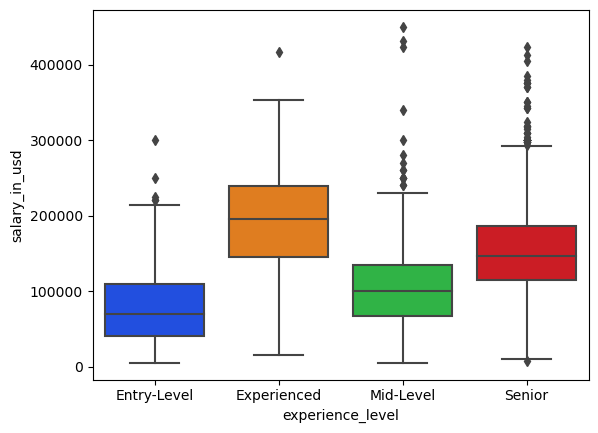

In [452]:
sns.boxplot(data=df,x=df['experience_level'], y=df['salary_in_usd'])
# salary increases from entry to experience 
# salary of experienced is more than that of snior
# outliers are present

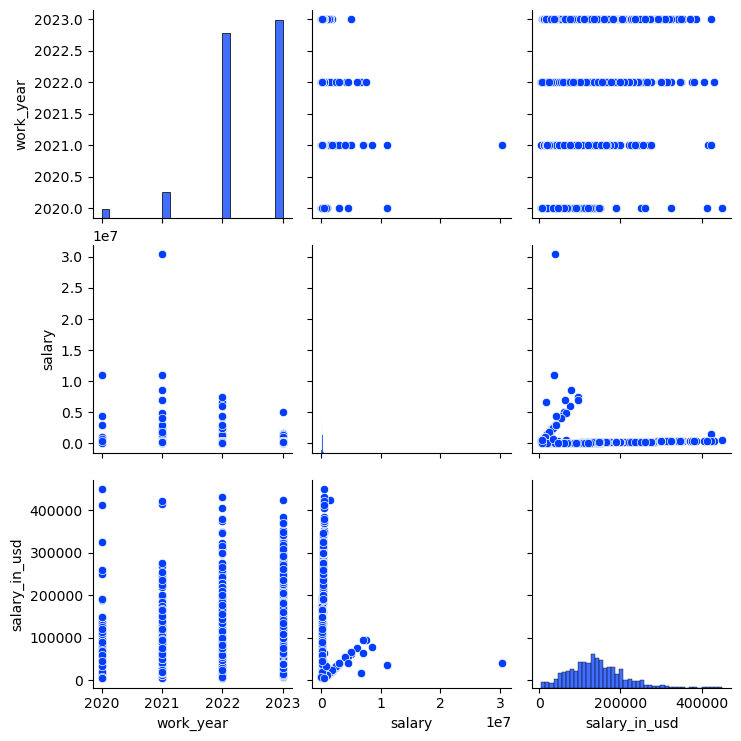

In [453]:
sns.pairplot(data=df)

# Statistics 

In [454]:
# slicing the data for data analyst
df_analyst = df[df["job_title"] == "Data Analyst"]

In [455]:
# slicing the data for data scientist
df_scientist = df[df["job_title"] == "Data Scientist"]

In [456]:
df_combined = [df_analyst,df_scientist]

In [457]:
df_analyst_scientist = pd.concat(df_combined)

# Data analyst and Data scientist

In [458]:
df_analyst_scientist.head(5)

work_year experience_level employment_type     job_title  salary  \
11       2023      Entry-Level       Full-Time  Data Analyst   75000   
12       2023      Entry-Level       Full-Time  Data Analyst   70000   
13       2023      Entry-Level       Full-Time  Data Analyst   85000   
14       2023      Entry-Level       Full-Time  Data Analyst   75000   
18       2023      Entry-Level       Full-Time  Data Analyst   55000   

   salary_currency  salary_in_usd company_location company_size  
11             USD          75000               US       Medium  
12             USD          70000               US       Medium  
13             USD          85000               US       Medium  
14             USD          75000               US       Medium  
18             CAD          40663               CA        Large

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

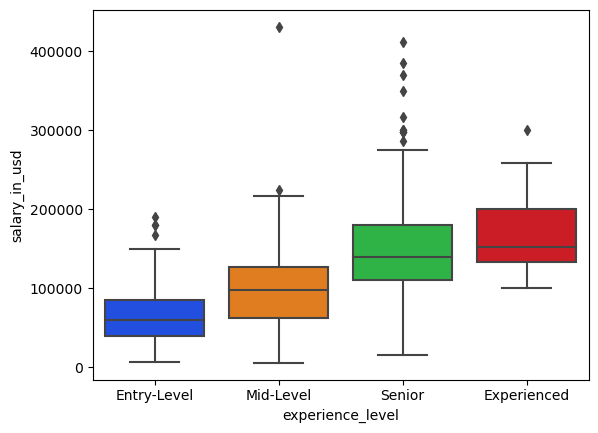

In [459]:
sns.boxplot(data=df_analyst_scientist,x=df_analyst_scientist['experience_level'], y=df_analyst_scientist['salary_in_usd'])
# salary increases as experience level increases except for senoior and experienced level which is close(median)
# outliers present

# T test

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

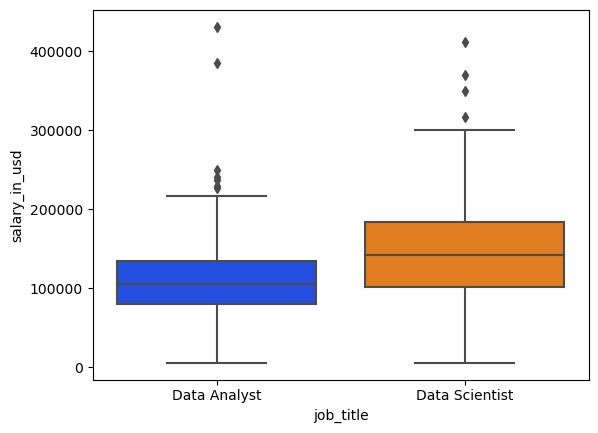

In [460]:
sns.boxplot(data=df_analyst_scientist,x=df_analyst_scientist['job_title'],y=df_analyst_scientist['salary_in_usd'])

# median salary of the data scientist is more than data analyst 

In [461]:
from scipy.stats import ttest_ind

analyst = df_analyst_scientist[df_analyst_scientist['job_title']=="Data Analyst"]['salary_in_usd'] 
scientist = df_analyst_scientist[df_analyst_scientist['job_title']=="Data Scientist"]['salary_in_usd']

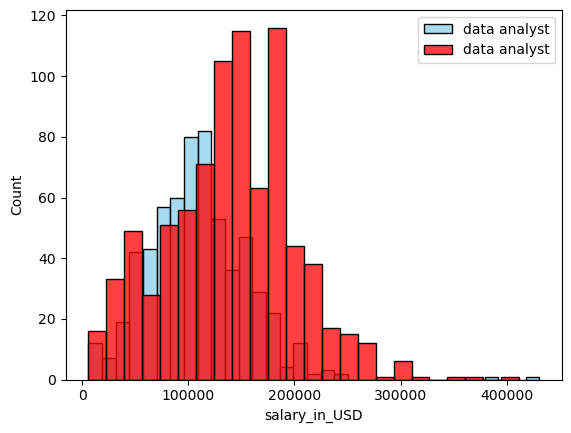

In [462]:
sns.histplot(analyst , color="skyblue" ,label="data analyst")
sns.histplot(scientist, color="red" ,label="data analyst")
plt.legend()
plt.xlabel("salary_in_USD")
plt.show()

In [463]:
res=ttest_ind(analyst,scientist)
res

Ttest_indResult(statistic=-10.968788267844122, pvalue=5.965431794715294e-27)

In [464]:
#Ttest_indResult(statistic=-10.9687, pvalue=5.965431794715294e-27)
#assumptions: samples should independent
#normality (bell shaped)
#spread should be roughly the same
#happy with spread be roughly the same although assumptions not met as not normal for t test, so do not interpret results
#2 sample WMW (Rank Sum) Test:
#H0 median_data_analyst salary =median_data_scientist salary (i.e. no relationship)
#H1: median_data_analyst salary != median_data_scientist salary (i.e. relationship)

In [465]:
from scipy.stats import ranksums
ranksums(analyst,scientist)

RanksumsResult(statistic=-11.29968423731376, pvalue=1.316906543036326e-29)

In [466]:
#we reject the null hypothesis (H0) at a significance level of 0.05. 
#This indicates a significant difference in median salaries between data analysts and data scientists

# Chi-square

In [467]:
#independence between experience_level and company_size
from scipy.stats import chi2_contingency
company_experience = pd.crosstab(index=df['experience_level'], columns=df["company_size"])
company_experience

company_size      Large  Medium  Small
experience_level                      
Entry-Level         100     171     49
Experienced          13      95      6
Mid-Level           136     623     50
Senior              207    2268     43

In [468]:
chi2_contingency(company_experience)

Chi2ContingencyResult(statistic=342.1599772883318, pvalue=7.436188252125432e-71, dof=6, expected_freq=array([[  38.79819197,  268.60941239,   12.59239564],
       [  13.82185589,   95.69210316,    4.48604095],
       [  98.08667907,  679.0781707 ,   31.83515023],
       [ 305.29327307, 2113.62031375,   99.08641319]]))

In [469]:
# H0: no relationship company_size and experience_level
# H1: company_size is dependent on experience_level
# Expectation >=5, happy assumptions
# p-value=7.436188252125432e-71 <0.05, therefore reject H0, company_size is dependent experience_level

# Full model

In [470]:
full_model = sm.OLS.from_formula('salary_in_usd ~ C(work_year)+C(experience_level)+C(employment_type)+C(company_size)', data=df_analyst_scientist).fit()

In [471]:
#fitted values
model_fitted_vals = full_model.fittedvalues
#model residuals
model_residuals = full_model.resid
#standardised residuals
model_norm_residuals = full_model.get_influence().resid_studentized_internal

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


Text(0, 0.5, 'Residuals')

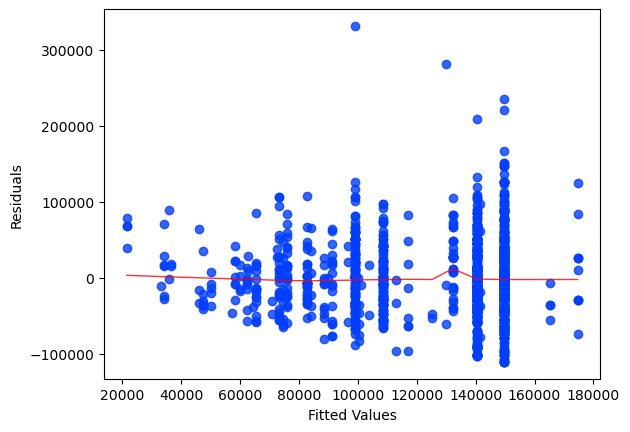

In [472]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

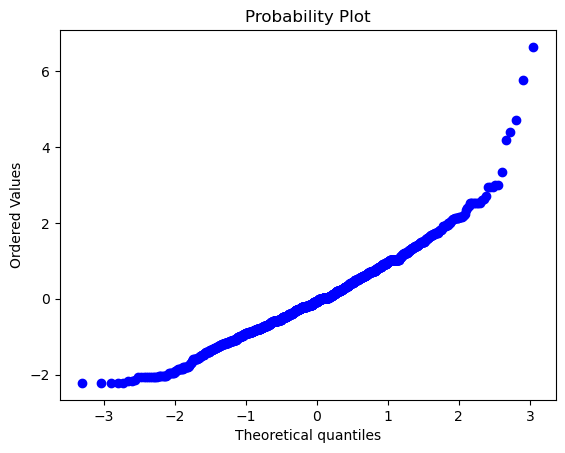

In [473]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [474]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     42.93
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           5.28e-81
Time:                        21:04:00   Log-Likelihood:                -17792.
No. Observations:                1454   AIC:                         3.561e+04
Df Residuals:                    1442   BIC:                         3.567e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.244e+04   5.13e+04      0.243      0.808   -8.82e+04    1.13e+05
C(work_year)[T.2021]               -1.267e+04   1.13e+04     -1.120      0.263   -3.49e+04    9523.424
C(work_year)[T.2022]                2460.9910   1.03e+04      0.238      0.812   -1.78e+04    2.28e+04
C(work_year)[T.2023]                1.175e+04   1.05e+04      1.122      0.262   -8798.703    3.23e+04
C(experience_level)[T.Experienced]  9.202e+04   1.43e+04      6.428      0.000    6.39e+04     1.2e+05
C(experience_level)[T.Mid-Level]    2.586e+04   5530.232      4.676      0.000     1.5e+04    3.67e+04
C(experience_level)[T.Senior]       6.702e+04   5217.740     12.844      0.000    5.68e+04    7.73e+04
C(employment_type)[T.Freelancer]    5.116e+04   7.09e+04      0.721      0.471    -8.8e+04     1.9e+05
C(employment_type)[T.Full-Time]     5.035e+04   5.01e+04      1.004      0.315    -4.8e+04    1.49e+05
C(employment_type)[T.Part-Time]     4.943e+04   5.34e+04      0.926      0.355   -5.53e+04    1.54e+05
C(company_size)[T.Medium]           8079.4773   5107.693      1.582      0.114   -1939.828    1.81e+04
C(company_size)[T.Small]           -2.863e+04   8796.810     -3.254      0.001   -4.59e+04   -1.14e+04
==============================================================================
Omnibus:                      189.900   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.109
Skew:                           0.720   Prob(JB):                    2.50e-104
Kurtosis:                       5.408   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Reduced model

In [475]:
reduced_formula = 'salary_in_usd ~ C(experience_level) + C(company_size)'
reduced_model = sm.OLS.from_formula(reduced_formula, data=df_analyst_scientist).fit()
# p-value in full model for work_year and employment type is > 0.05 so we have not cnsidered

In [476]:
#fitted values
model_fitted_vals = reduced_model.fittedvalues
#model residuals
model_residuals = reduced_model.resid
#standardised residuals
model_norm_residuals = reduced_model.get_influence().resid_studentized_internal

Text(0, 0.5, 'Residuals')

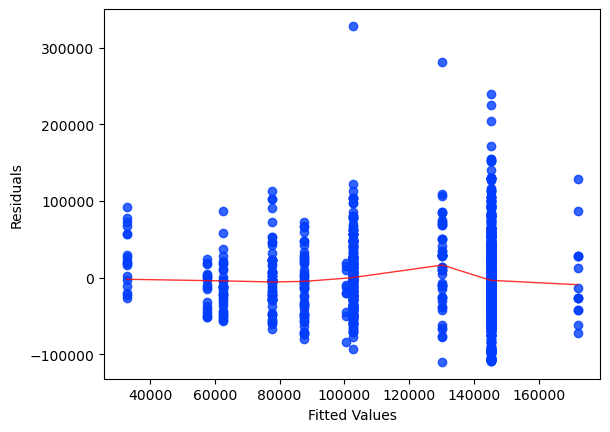

In [477]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

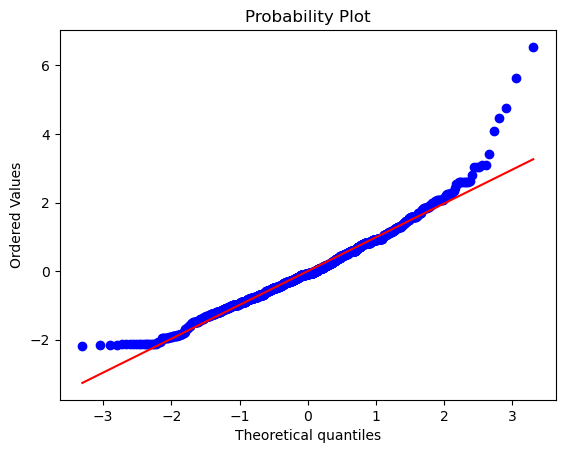

In [478]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [479]:
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     89.83
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.91e-82
Time:                        21:04:01   Log-Likelihood:                -17801.
No. Observations:                1454   AIC:                         3.561e+04
Df Residuals:                    1448   BIC:                         3.565e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           6.265e+04   5689.408     11.012      0.000    5.15e+04    7.38e+04
C(experience_level)[T.Experienced]  9.436e+04   1.43e+04      6.588      0.000    6.63e+04    1.22e+05
C(experience_level)[T.Mid-Level]    2.493e+04   5426.631      4.595      0.000    1.43e+04    3.56e+04
C(experience_level)[T.Senior]       6.757e+04   5096.313     13.259      0.000    5.76e+04    7.76e+04
C(company_size)[T.Medium]           1.497e+04   4697.413      3.187      0.001    5755.472    2.42e+04
C(company_size)[T.Small]           -2.988e+04   8603.955     -3.473      0.001   -4.68e+04    -1.3e+04
==============================================================================
Omnibus:                      189.967   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.771
Skew:                           0.727   Prob(JB):                    2.66e-102
Kurtosis:                       5.368   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interaction effect 

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

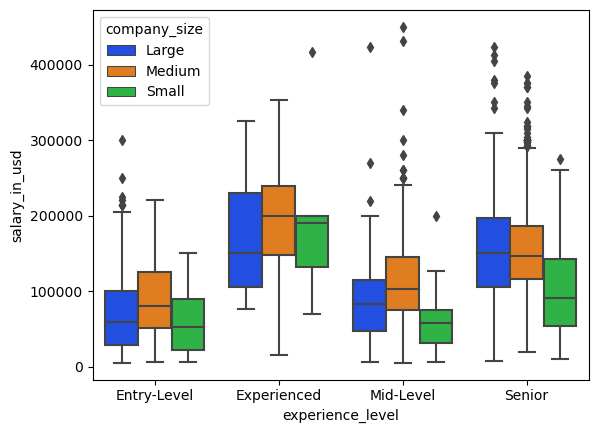

In [480]:
sns.boxplot(x=df['experience_level'], hue=df['company_size'], y=df['salary_in_usd'])

# medium size company has more salary in each company size
# for all expereicne level salary increases as experience increases except for experienced and senior level

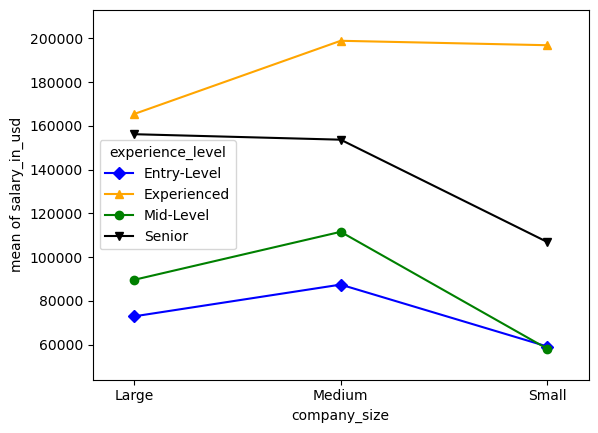

In [481]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(df['company_size'], df['experience_level'], df['salary_in_usd'],
 colors=['blue','orange','green','black'], markers=['D','^','o','v'])
plt.show()

# for small company entry and mid level has similar salary
# for medium company all experience level has difference in salary
# for large company senior and experienced has salary with not much difference

In [482]:
#perform two-way ANOVA with interaction
model = ols('salary_in_usd ~ C(experience_level) + C(company_size) + C(experience_level):C(company_size)', data=df_analyst_scientist).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     52.94
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.60e-83
Time:                        21:04:01   Log-Likelihood:                -17790.
No. Observations:                1454   AIC:                         3.560e+04
Df Residuals:                    1444   BIC:                         3.565e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      5.07e+04   8453.694      5.998      0.000    3.41e+04    6.73e+04
C(experience_level)[T.Experienced]                             4.76e+04   7329.950      6.493      0.000    3.32e+04     6.2e+04
C(experience_level)[T.Mid-Level]                              2.577e+04    1.1e+04      2.348      0.019    4237.314    4.73e+04
C(experience_level)[T.Senior]                                 9.884e+04    1.1e+04      9.004      0.000    7.73e+04     1.2e+05
C(company_size)[T.Medium]                                     2.609e+04   1.04e+04      2.514      0.012    5728.641    4.64e+04
C(company_size)[T.Small]                                      8502.8794   1.45e+04      0.586      0.558      -2e+04     3.7e+04
C(experience_level)[T.Experienced]:C(company_size)[T.Medium]   4.76e+04   7329.950      6.493      0.000    3.32e+04     6.2e+04
C(experience_level)[T.Mid-Level]:C(company_size)[T.Medium]    3230.4710   1.29e+04      0.250      0.802   -2.21e+04    2.85e+04
C(experience_level)[T.Senior]:C(company_size)[T.Medium]      -3.128e+04   1.26e+04     -2.477      0.013   -5.61e+04   -6511.231
C(experience_level)[T.Experienced]:C(company_size)[T.Small]   2.878e-12   1.11e-12      2.588      0.010    6.96e-13    5.06e-12
C(experience_level)[T.Mid-Level]:C(company_size)[T.Small]    -4.267e+04      2e+04     -2.138      0.033   -8.18e+04   -3511.193
C(experience_level)[T.Senior]:C(company_size)[T.Small]       -7.757e+04   2.26e+04     -3.436      0.001   -1.22e+05   -3.33e+04
==============================================================================
Omnibus:                      181.578   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.878
Skew:                           0.702   Prob(JB):                     3.03e-96
Kurtosis:                       5.299   Cond. No.                     1.07e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.7e-37. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [483]:
#fitted values
model_fitted_vals = model.fittedvalues
#model residuals
model_residuals = model.resid
#standardised residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

Text(0, 0.5, 'Residuals')

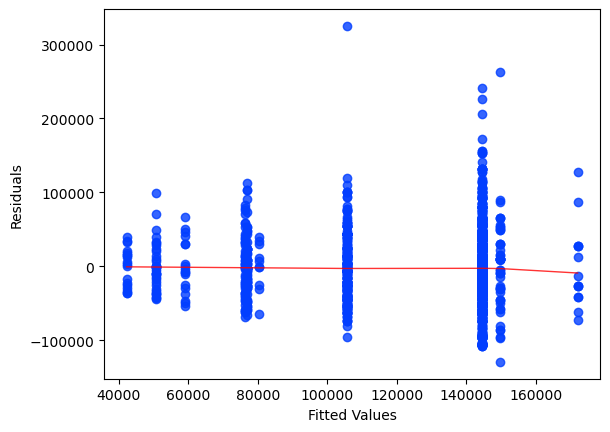

In [484]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

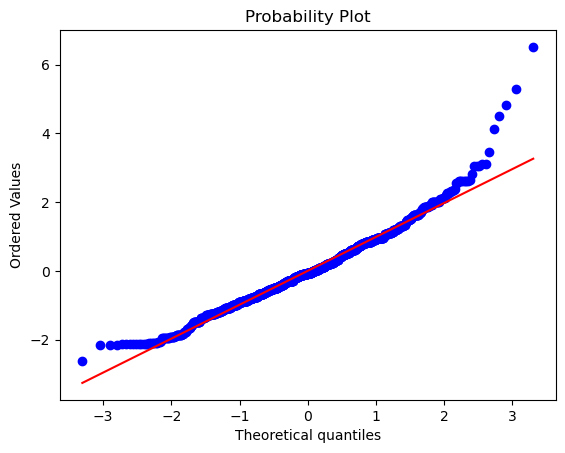

In [485]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [486]:
#model = ols('salary_in_usd ~ C(experience_level) * C(company_size) ', data=df_analyst_scientist).fit()
#model.summary()

In [487]:
sm.stats.anova_lm(model, typ=1)

df        sum_sq       mean_sq  \
C(experience_level)                     3.0  1.037546e+12  3.458486e+11   
C(company_size)                         2.0  9.974506e+10  4.987253e+10   
C(experience_level):C(company_size)     6.0  5.493528e+10  9.155881e+09   
Residual                             1444.0  3.611838e+12  2.501273e+09   

                                              F        PR(>F)  
C(experience_level)                  138.269014  9.498150e-79  
C(company_size)                       19.938859  2.871281e-09  
C(experience_level):C(company_size)    3.660488  1.301054e-03  
Residual                                    NaN           NaN

In [488]:
# 1st hyp: H0: true salary means are equal across the experience_level
# H1: not all the means are equal
# 2nd: H0 true salary means are equal across the company_size
# H1: not all the means are equal
# 3rd: H0: no interaction between experience_level and company_size
# H1: there is an interaction
# 1st hyp: p-value=9.498150e-79, reject the null, there is relationship between salary and experience_level 
# 2nd hyp: p-value=2.871281e-09, reject the null, there is a relationship between salary and company_size 
# 3rd hyp: p-value= 1.301054e-03,reject the null, there is interaction between experience_level and company_size

# without interaction

In [489]:
#perform two-way ANOVA without interaction
model2 = ols('salary_in_usd ~ C(experience_level) + C(company_size)', data=df_analyst_scientist).fit()
#fitted values
model_fitted_vals = model2.fittedvalues
#model residuals
model_residuals = model2.resid
#standardised residuals
model_norm_residuals = model2.get_influence().resid_studentized_internal

In [490]:
#fitted values
model_fitted_vals = model2.fittedvalues
#model residuals
model_residuals = model2.resid
#standardised residuals
model_norm_residuals = model2.get_influence().resid_studentized_internal

Text(0, 0.5, 'Residuals')

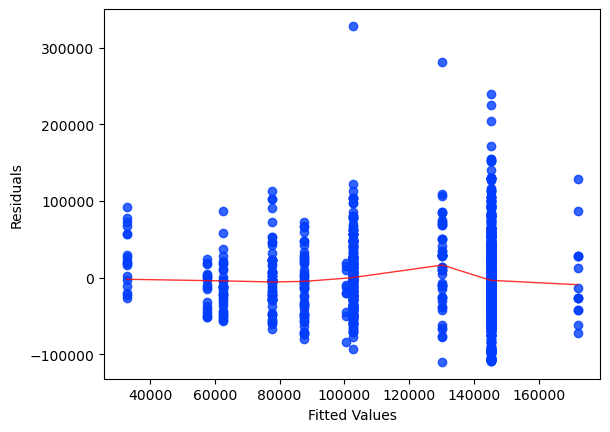

In [491]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

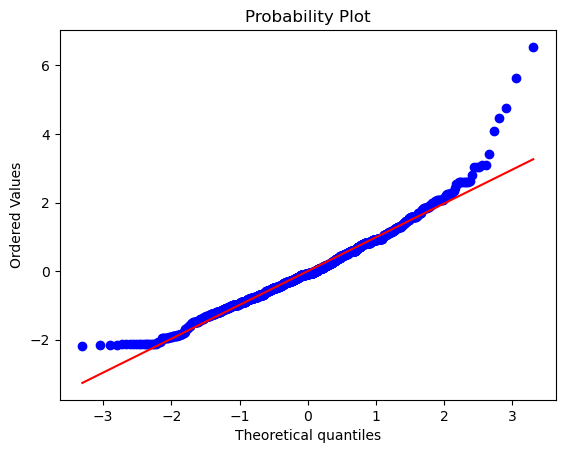

In [492]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [493]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     89.83
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.91e-82
Time:                        21:04:03   Log-Likelihood:                -17801.
No. Observations:                1454   AIC:                         3.561e+04
Df Residuals:                    1448   BIC:                         3.565e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           6.265e+04   5689.408     11.012      0.000    5.15e+04    7.38e+04
C(experience_level)[T.Experienced]  9.436e+04   1.43e+04      6.588      0.000    6.63e+04    1.22e+05
C(experience_level)[T.Mid-Level]    2.493e+04   5426.631      4.595      0.000    1.43e+04    3.56e+04
C(experience_level)[T.Senior]       6.757e+04   5096.313     13.259      0.000    5.76e+04    7.76e+04
C(company_size)[T.Medium]           1.497e+04   4697.413      3.187      0.001    5755.472    2.42e+04
C(company_size)[T.Small]           -2.988e+04   8603.955     -3.473      0.001   -4.68e+04    -1.3e+04
==============================================================================
Omnibus:                      189.967   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.771
Skew:                           0.727   Prob(JB):                    2.66e-102
Kurtosis:                       5.368   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [494]:
anovaResults = sm.stats.anova_lm(reduced_model,full_model)
anovaResults

df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0    1448.0  3.666400e+12      0.0           NaN       NaN       NaN
1    1442.0  3.618696e+12      6.0  4.770348e+10  3.168196  0.004316

the p value < 0.05 therefore its significant and we can reject the null hypothesis and conclude that the reduced model is preferred.

## Our model doenot predict the salary, however the company_size and experience level effects the salary structure of data sciene jobs

## non interaction

In [495]:
model = sm.OLS.from_formula('salary_in_usd ~ C(work_year)+C(employment_type)', data=df_analyst_scientist).fit()

In [496]:
#fitted values
model_fitted_vals = model.fittedvalues
#model residuals
model_residuals = model.resid
#standardised residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


Text(0, 0.5, 'Residuals')

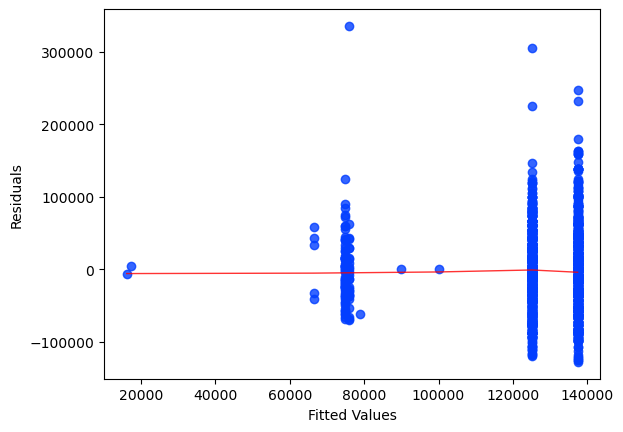

In [497]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

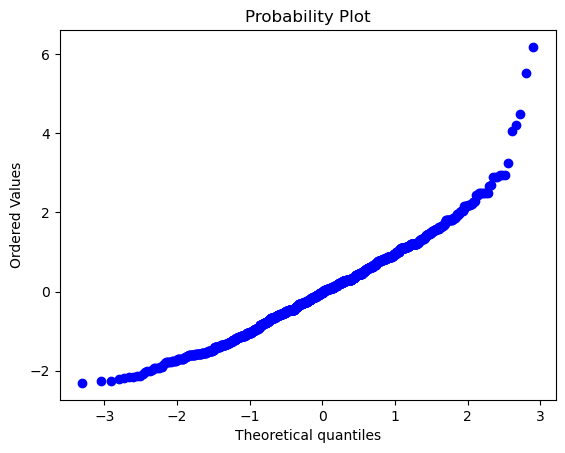

In [498]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

In [499]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.12
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.08e-22
Time:                        21:04:03   Log-Likelihood:                -17940.
No. Observations:                1454   AIC:                         3.589e+04
Df Residuals:                    1447   BIC:                         3.593e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         4.092e+04   5.63e+04      0.726      0.468   -6.96e+04    1.51e+05
C(work_year)[T.2021]             -1263.2487   1.24e+04     -0.102      0.919   -2.55e+04     2.3e+04
C(work_year)[T.2022]              4.908e+04   1.05e+04      4.670      0.000    2.85e+04    6.97e+04
C(work_year)[T.2023]              6.135e+04   1.05e+04      5.834      0.000    4.07e+04     8.2e+04
C(employment_type)[T.Freelancer]      1e+04   7.83e+04      0.128      0.898   -1.44e+05    1.64e+05
C(employment_type)[T.Full-Time]   3.514e+04   5.54e+04      0.634      0.526   -7.35e+04    1.44e+05
C(employment_type)[T.Part-Time]  -2.351e+04   5.87e+04     -0.400      0.689   -1.39e+05    9.17e+04
==============================================================================
Omnibus:                      135.983   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.627
Skew:                           0.606   Prob(JB):                     3.44e-58
Kurtosis:                       4.702   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [500]:
#interpet this result also

# Individual interaction 

In [501]:
model = ols('salary_in_usd ~ C(experience_level)', data=df_analyst_scientist).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     133.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.42e-76
Time:                        21:04:03   Log-Likelihood:                -17821.
No. Observations:                1454   AIC:                         3.565e+04
Df Residuals:                    1450   BIC:                         3.567e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           6.671e+04   4614.074     14.458      0.000    5.77e+04    7.58e+04
C(experience_level)[T.Experienced]  1.053e+05   1.44e+04      7.320      0.000    7.71e+04    1.33e+05
C(experience_level)[T.Mid-Level]    3.109e+04   5400.038      5.757      0.000    2.05e+04    4.17e+04
C(experience_level)[T.Senior]       7.726e+04   4890.661     15.797      0.000    6.77e+04    8.69e+04
==============================================================================
Omnibus:                      174.256   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.251
Skew:                           0.688   Prob(JB):                     3.69e-89
Kurtosis:                       5.198   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [502]:
model = ols('salary_in_usd ~ C(company_size)', data=df_analyst_scientist).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     64.68
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.23e-27
Time:                        21:04:03   Log-Likelihood:                -17936.
No. Observations:                1454   AIC:                         3.588e+04
Df Residuals:                    1451   BIC:                         3.589e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  9.709e+04   4710.301     20.612      0.000    8.78e+04    1.06e+05
C(company_size)[T.Medium]  3.598e+04   4957.665      7.257      0.000    2.63e+04    4.57e+04
C(company_size)[T.Small]  -3.987e+04   9394.968     -4.244      0.000   -5.83e+04   -2.14e+04
==============================================================================
Omnibus:                      143.243   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.146
Skew:                           0.670   Prob(JB):                     4.80e-55
Kurtosis:                       4.528   Cond. No.                         9.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""